In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [4]:
df=pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
df['date']=df['date'].astype(str)
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
df['new']=df['date'].str.split('.')

In [8]:
df['Month']=df['new'][1][1]
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,new,Month
0,02.01.2013,0,59,22154,999.00,1.0,"[02, 01, 2013]",01
1,03.01.2013,0,25,2552,899.00,1.0,"[03, 01, 2013]",01
2,05.01.2013,0,25,2552,899.00,-1.0,"[05, 01, 2013]",01
3,06.01.2013,0,25,2554,1709.05,1.0,"[06, 01, 2013]",01
4,15.01.2013,0,25,2555,1099.00,1.0,"[15, 01, 2013]",01


In [9]:
df['Month']=df['Month'].astype(int)
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,new,Month
0,02.01.2013,0,59,22154,999.00,1.0,"[02, 01, 2013]",1
1,03.01.2013,0,25,2552,899.00,1.0,"[03, 01, 2013]",1
2,05.01.2013,0,25,2552,899.00,-1.0,"[05, 01, 2013]",1
3,06.01.2013,0,25,2554,1709.05,1.0,"[06, 01, 2013]",1
4,15.01.2013,0,25,2555,1099.00,1.0,"[15, 01, 2013]",1


In [10]:
df['day']=df['new'][1][0]
df['day']=df['day'].astype(int)
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,new,Month,day
0,02.01.2013,0,59,22154,999.00,1.0,"[02, 01, 2013]",1,3
1,03.01.2013,0,25,2552,899.00,1.0,"[03, 01, 2013]",1,3
2,05.01.2013,0,25,2552,899.00,-1.0,"[05, 01, 2013]",1,3
3,06.01.2013,0,25,2554,1709.05,1.0,"[06, 01, 2013]",1,3
4,15.01.2013,0,25,2555,1099.00,1.0,"[15, 01, 2013]",1,3


In [11]:
df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
new               0
Month             0
day               0
dtype: int64

In [12]:
df.groupby(['date','shop_id','item_id']).sum()
df.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,new,Month,day
0,02.01.2013,0,59,22154,999.00,1.0,"[02, 01, 2013]",1,3
1,03.01.2013,0,25,2552,899.00,1.0,"[03, 01, 2013]",1,3
2,05.01.2013,0,25,2552,899.00,-1.0,"[05, 01, 2013]",1,3
3,06.01.2013,0,25,2554,1709.05,1.0,"[06, 01, 2013]",1,3
4,15.01.2013,0,25,2555,1099.00,1.0,"[15, 01, 2013]",1,3
5,10.01.2013,0,25,2564,349.00,1.0,"[10, 01, 2013]",1,3
6,02.01.2013,0,25,2565,549.00,1.0,"[02, 01, 2013]",1,3
7,04.01.2013,0,25,2572,239.00,1.0,"[04, 01, 2013]",1,3
8,11.01.2013,0,25,2572,299.00,1.0,"[11, 01, 2013]",1,3
9,03.01.2013,0,25,2573,299.00,3.0,"[03, 01, 2013]",1,3


In [13]:
df=df.drop(columns=['day','item_price','new','Month'])

In [14]:
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day
0,02.01.2013,0,59,22154,1.0
1,03.01.2013,0,25,2552,1.0
2,05.01.2013,0,25,2552,-1.0
3,06.01.2013,0,25,2554,1.0
4,15.01.2013,0,25,2555,1.0


In [15]:
df['date']=pd.to_datetime(df['date'])
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day
0,2013-02-01,0,59,22154,1.0
1,2013-03-01,0,25,2552,1.0
2,2013-05-01,0,25,2552,-1.0
3,2013-06-01,0,25,2554,1.0
4,2013-01-15,0,25,2555,1.0


In [16]:
df['date']=df['date'].dt.strftime('%Y-%m')

In [17]:
df.tail()

,date,date_block_num,shop_id,item_id,item_cnt_day
2935844,2015-10,33,25,7409,1.0
2935845,2015-09,33,25,7460,1.0
2935846,2015-10,33,25,7459,1.0
2935847,2015-10,33,25,7440,1.0
2935848,2015-03,33,25,7460,1.0


In [18]:
df.drop(columns=['date_block_num'])
df=df.groupby(['date','shop_id','item_id']).sum()
df=df.pivot_table(index=['shop_id','item_id'], columns='date', values='item_cnt_day', fill_value=0)
df.reset_index(inplace=True)
df.head()

date,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,4,6,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,2,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,2,6,0,1,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_test=pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
df_test=pd.merge(df_test,df,on=['shop_id','item_id'],how='left')
df_test.drop(['ID'], axis=1, inplace=True)
df_test=df_test.fillna(0)
df_test.head()

,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split
y=df['2015-12'].values
X=df.drop(columns=['2015-12'],axis=1)


In [ ]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier,LGBMRegressor
import matplotlib.pyplot as plt
ac=[]
for i in range(100):
    X_train,X_dev,y_train,y_dev=train_test_split(X,y,test_size=0.2,random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    #y_pred=model.predict(X_dev)
    ac.append(model.score(X_dev,y_dev))
print(ac.index(max(ac)))
plt.plot(np.arange(100),ac)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ac=[]
for i in range(100):
    X_train,X_dev,y_train,y_dev=train_test_split(X,y,test_size=0.2,random_state=i)
    model=Ridge()
    model.fit(X_train,y_train)
    #y_pred=model.predict(X_dev)
    ac.append(model.score(X_dev,y_dev))
print(ac.index(max(ac)))
print(max(ac))
plt.plot(np.arange(100),ac)
plt.show()

In [ ]:
ac=[]
X_train,X_dev,y_train,y_dev=train_test_split(X,y,test_size=0.2,random_state=54)
alpha=[0.01,0.5,0.1,1,10,100000]
for i in alpha:
    model=Ridge(alpha=i)
    model.fit(X_train,y_train)
    #y_pred=model.predict(X_dev)
    ac.append(model.score(X_dev,y_dev))
print(alpha[ac.index(max(ac))])
print(max(ac))
plt.plot(np.arange(6),ac)
plt.show()

In [2]:
X_train,X_dev,y_train,y_dev=train_test_split(X,y,test_size=0.2,random_state=54)
model=Ridge(alpha=100000)
model.fit(X_train,y_train)

NameError: name 'train_test_split' is not defined

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning,DataConversionWarning
import warnings
warnings.filterwarnings("ignore",category=ConvergenceWarning)
X_train,X_dev,y_train,y_dev=train_test_split(X,y,test_size=0.2,random_state=54)
ac=[]
for i in range(1,30):
    model=MLPRegressor(random_state=54,max_iter=i)
    model.fit(X_train,y_train)
    #y_pred=model.predict(X_dev)
    ac.append(model.score(X_dev,y_dev))
print(ac.index(max(ac)))
print(max(ac))


8
0.832076776693261


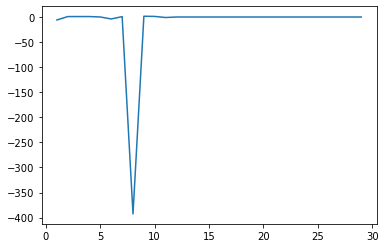

In [28]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,30),ac)
plt.show()

In [ ]:
X_test=df_test
df_final=pd.DataFrame()
df_final['ID']=range(0,214200)
df_final['item_cnt_month']=model.predict(X_test)
#df_final_=df_final.to_string(index=False)
#df_final['item_cnt_month']=df['item_cnt_month']/12 
df_final.to_csv('submission3.csv', index=False)

table=pd.pivot_table(df_new, values='item_cnt_day', index=['shop_id', 'item_id'],
                    columns=['date_block_num'], aggfunc=np.sum, fill_value=0)
table

for i in range(1,34):
    table[0]+=table[i]

lis=table[0].tolist()
shopid=[]
itemid=[]
for i in table.index:
    shopid.append(i[0])
    itemid.append(i[1])
data = {'shop_id':shopid,
        'item_id':itemid,
        'item_cnt_month':lis}
df2=pd.DataFrame(data)
df2.head()

y=df2['item_cnt_month']/34.0
X=df2.drop(columns=['item_cnt_month'])
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.svm import SVR
model=SVR(C=1.0, epsilon=0.2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=3)
# print(all_accuracies.mean())
model.score(X_test,y_test)